In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

In [122]:
import re
prefix="./Source_100Phileball10/100Phileball10_1205_1711_"
fName=prefix+"parameters.dat"
print(fName)
row=0
param=open(fName,"r")
for line in param:
    splitted=re.split('[: ]',line)
    print(splitted)
    row+=1
    if splitted[0]=="FLP":
        FLP=splitted[1]
        BP=splitted[3]
        RBP=splitted[5]
        break
FLP=int(FLP)
BP=int(BP)
RBP=int(RBP)
print(FLP, BP, RBP)
print(FLP+BP+4)


./Source_100Phileball10/100Phileball10_1205_1711_parameters.dat
['Source', 'Image', '100Phileball10.png\n']
['FLP', '8000', 'BP', '960', 'OBP', '80\n']
8000 960 80
8964


In [123]:
import sys

fName=prefix+"data.dat"
readFile = open(fName,"r")
spaceCount=0
indexCount=0
pIndex=0
targetIndex=301
array =np.zeros((FLP,10))
arrayRigid=np.zeros((RBP, 10))
arrayWall=np.zeros((BP, 10))

for line in readFile:
    if line=='\n':
        spaceCount+=1
    if indexCount==targetIndex and spaceCount==0:
        splitted=line.split()
        for j in range(10):
            array[pIndex][j]=splitted[j]
        pIndex+=1
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>targetIndex:
        break
print(pIndex)
readFile.close()

px=np.zeros(FLP)
py=np.zeros(FLP)
vx=np.zeros(FLP)
vy=np.zeros(FLP)
vabs=np.zeros(FLP)
for i in range(FLP):
    px[i]=array[i][1]
    py[i]=array[i][2]
    vx[i]=array[i][3]
    vy[i]=array[i][4]
    vabs[i]=array[i][5]


#Rigid Body
spaceCount=0
indexCount=0
pIndex=0
readFile = open(fName,"r")
for line in readFile:
    if line=='\n':
        spaceCount+=1
    if indexCount==targetIndex+1 and spaceCount==0:
        splitted=line.split()
        for j in range(10):
            arrayRigid[pIndex][j]=splitted[j]
        pIndex+=1
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>targetIndex+1:
        break

readFile.close()
rpx=np.zeros(RBP)
rpy=np.zeros(RBP)
rvx=np.zeros(RBP)
rvy=np.zeros(RBP)
rvabs=np.zeros(RBP)
for i in range(RBP):
    rpx[i]=arrayRigid[i][1]
    rpy[i]=arrayRigid[i][2]
    rvx[i]=arrayRigid[i][3]
    rvy[i]=arrayRigid[i][4]
    rvabs[i]=arrayRigid[i][5]
print(pIndex)

#wall 
spaceCount=0
indexCount=0
pIndex=0
readFile = open(fName,"r")
for line in readFile:
    if line=='\n':
        spaceCount+=1
    if spaceCount!=0:
        break;
    splitted=line.split()
    for j in range(10):
        arrayWall[pIndex][j]=splitted[j]
    pIndex+=1
   
bpx=np.zeros(BP)
bpy=np.zeros(BP)
bvx=np.zeros(BP)
bvy=np.zeros(BP)
bvabs=np.zeros(BP)
for i in range(BP):
    bpx[i]=arrayWall[i][1]
    bpy[i]=arrayWall[i][2]
    bvx[i]=arrayWall[i][3]
    bvy[i]=arrayWall[i][4]
    bvabs[i]=arrayWall[i][5]
print(pIndex)

8000
80
960


<IPython.core.display.Javascript object>


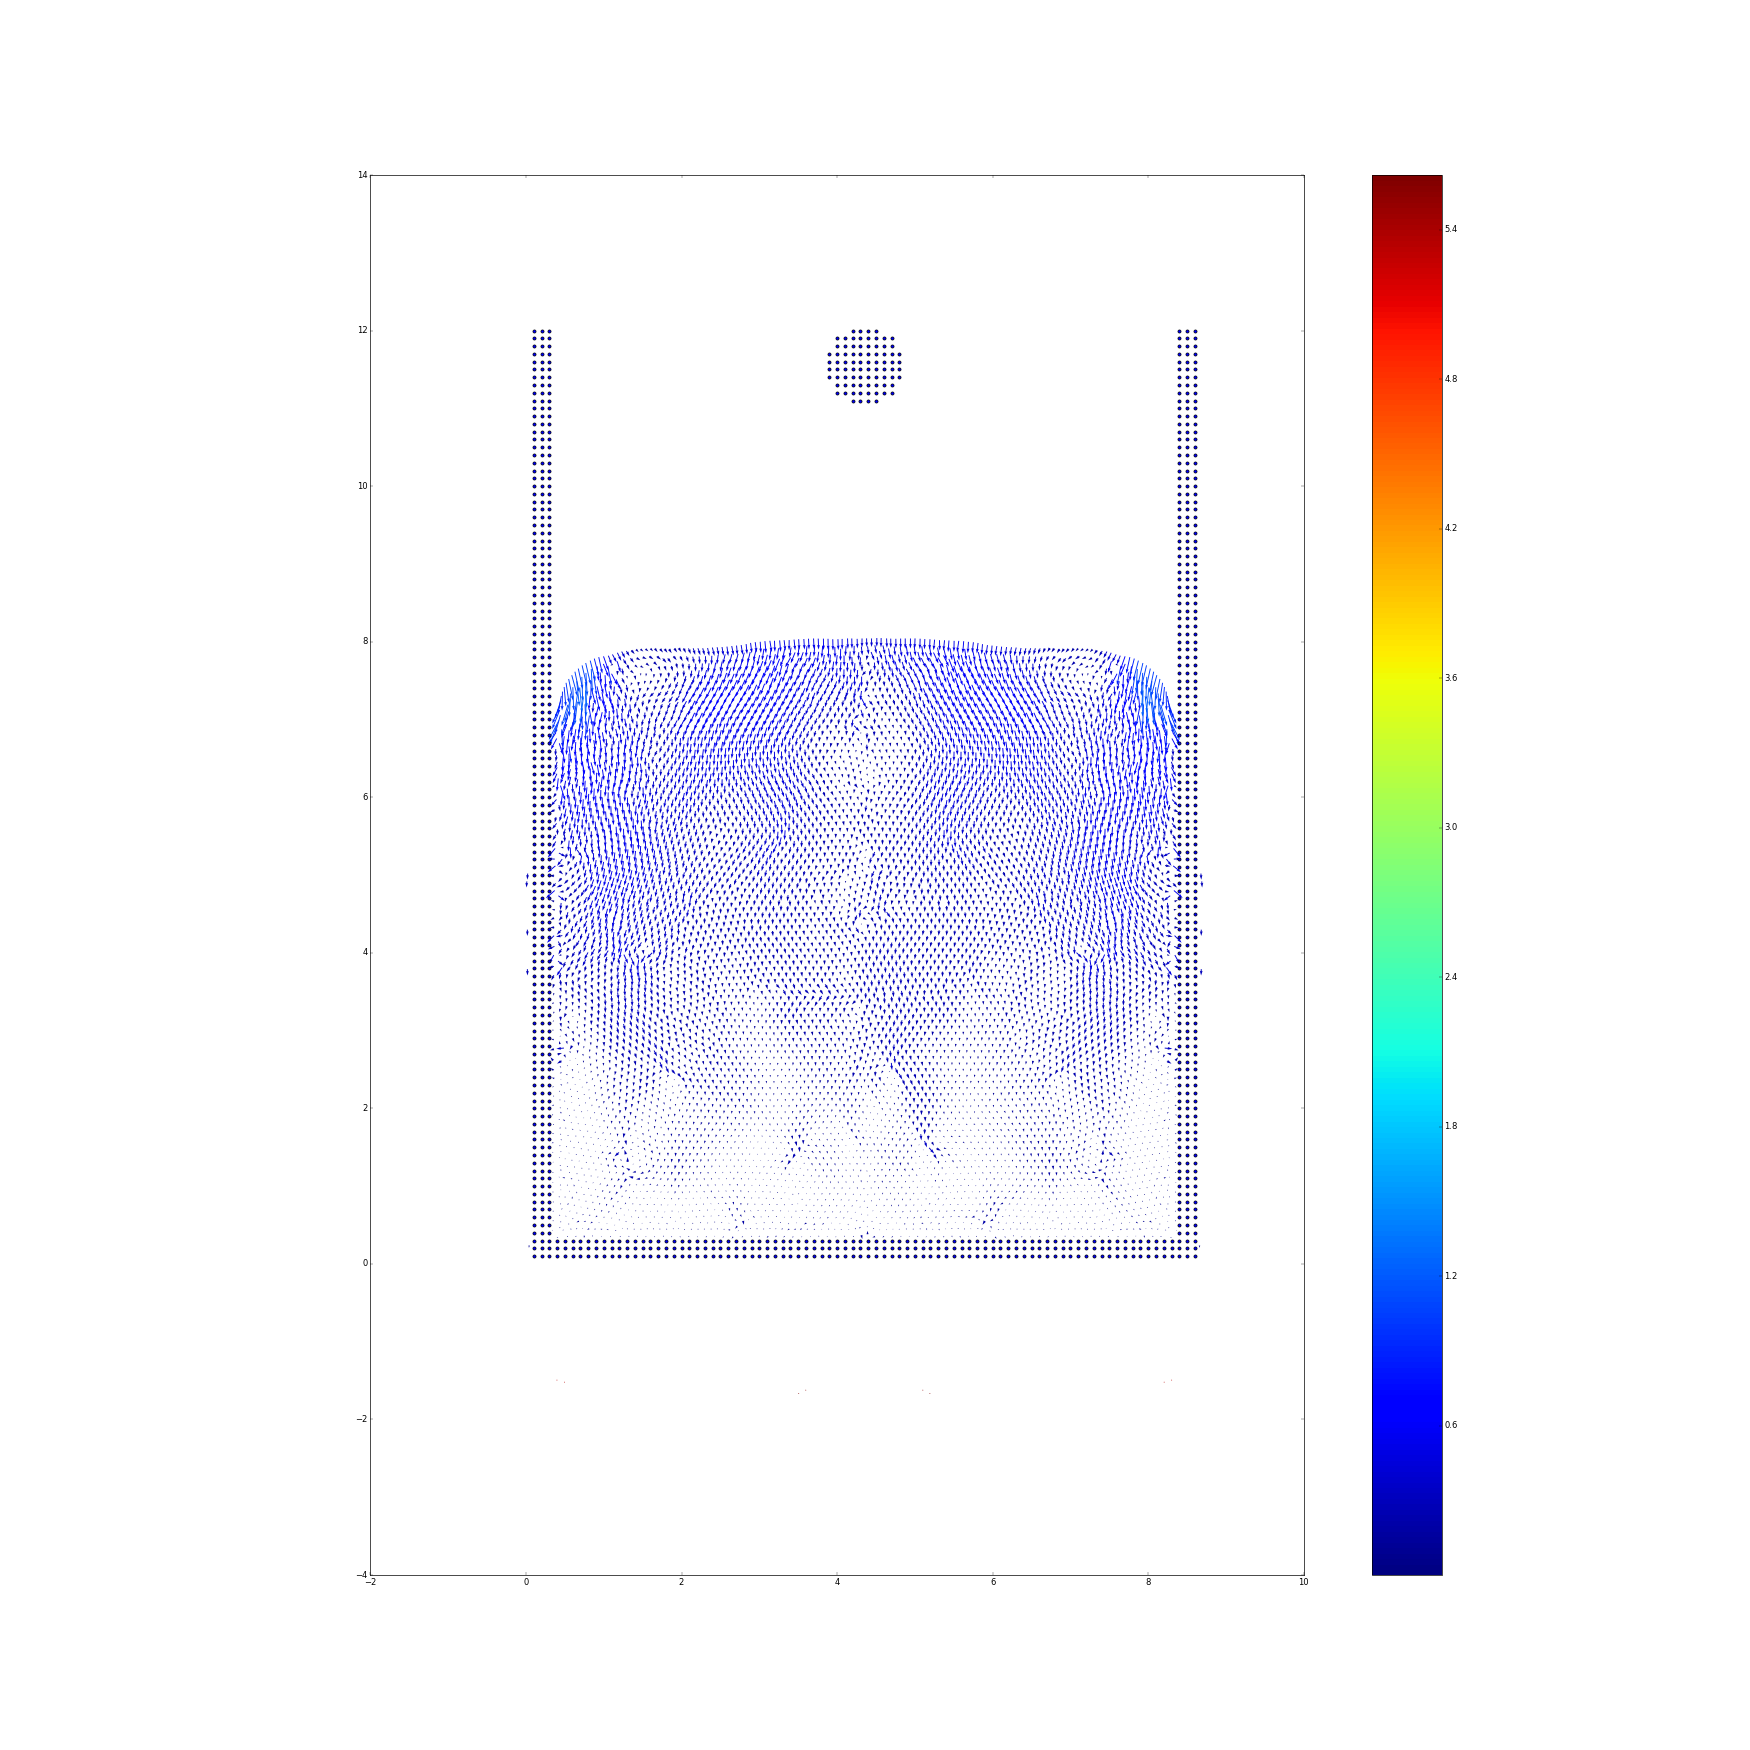

In [128]:


plt.figure(figsize=(35,35), dpi=50)
q=plt.quiver(px, py, vx, vy, vabs, color='red', angles='xy', width=0.001, cmap=plt.cm.jet)
plt.scatter(bpx, bpy)
plt.scatter(rpx, rpy)
plt.colorbar(q, cmap=plt.cm.jet)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [127]:
for i in range(FLP):
    if py[i]<-1:
        vx[i]=0
        vy[i]=0
        print(i)

print(np.average(vx))
print(np.average(vy))

rms_vx=0
rms_vy=0
for i in range(FLP):
    rms_vx+=vx[i]*vx[i]
    rms_vy+=vy[i]*vy[i]

print("root mean square")
rms_vx=np.sqrt(rms_vx/float(FLP))
rms_vy=np.sqrt(rms_vy/float(FLP))

print(rms_vx, rms_vy)

101
200
3000
3200
4700
4900
7700
7801
-0.000149460420236
-0.265830599339
root mean square
0.0819760350066 0.321974865136


In [138]:
for i in range(FLP):
    if py[i]<-1:
        vx[i]=0
        vy[i]=0
        vabs[i]=0

In [118]:
plt.plot(py, vabs)

In [104]:
plt.colorbar?

In [15]:
test=open("analyzerTest.dat","w")
for i in range(7):
    for j in range(3):
        string='%d %d.%d %d.%d %d.%d\n'%(i+1, (j)*10,i+1, (j+1)*10,i+1, (j+2)*100,i+1)
        test.write(string)
    string='\n\n'
    test.write(string)
test.close()